NAME : Pratik Vijay Bhagyawant\ 
CLASS : TE-AI&DS\
ROLL No : 2437016\
Batch : A\
SUB : Software Laboratory II (Artificial Neural Network)

Problem Statement :\
For an image classification challenge, create and train a ConvNet in Python using TensorFlow. Also
try to improve the performance of the model by applying various hyper parameter tuning to reduce the
overfitting or under fitting problem that might occur. Maintain graphs of comparisons. 

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, models, layers

In [2]:
(x_train10, y_train10), (x_test10, y_test10) = datasets.cifar10.load_data()

In [3]:
x_train10.shape, y_train10.shape, x_test10.shape, y_test10.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

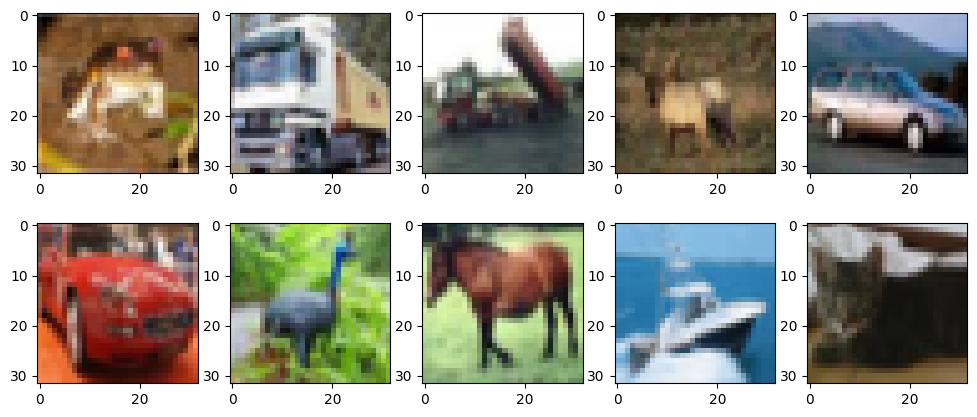

In [4]:
plt.figure(figsize=(12,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train10[i])

In [5]:
x_train10[111].flatten()

array([135, 160, 179, ..., 139, 139, 140], dtype=uint8)

In [6]:
x_train10 = x_train10/255.0
x_test10  = x_test10 /255.0

In [8]:
x_train10[111].flatten()

array([0.52941176, 0.62745098, 0.70196078, ..., 0.54509804, 0.54509804,
       0.54901961])

In [9]:
x_test10, x_val10, y_test10, y_val10 = train_test_split(x_test10, y_test10, test_size=0.5, random_state=111)

In [10]:
x_train10.shape[0], x_test10.shape[0], x_val10.shape[0]

(50000, 5000, 5000)

In [11]:
def Graphs(accuracy, loss, val_accuracy, val_loss, epochs):
    # Create a figure and axis object
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    # Plot the first subplot (Training Accuracy)
    ax1.plot(epochs, accuracy, 'y', label='Training Accuracy')
    ax1.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
    ax1.set_title('Accuracy Graph')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    # Plot the second subplot (Training Loss)
    ax2.plot(epochs, loss, 'y', label='Training Loss')
    ax2.plot(epochs, val_loss, 'r', label='Validation Loss')
    ax2.set_title('Loss Graph')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend()
    # Adjust layout
    plt.tight_layout()
    # Show the figure
    plt.show()

In [12]:
model1 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

C:\Users\ok\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model1.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
history = model1.fit(x_train10, y_train10, validation_data=(x_val10, y_val10), batch_size= 32, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.1425 - loss: 2.2582 - val_accuracy: 0.2394 - val_loss: 2.0187
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.2922 - loss: 1.9202 - val_accuracy: 0.3612 - val_loss: 1.7510
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.4044 - loss: 1.6367 - val_accuracy: 0.4500 - val_loss: 1.5482
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.4571 - loss: 1.4764 - val_accuracy: 0.4470 - val_loss: 1.5099
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.5053 - loss: 1.3689 - val_accuracy: 0.4888 - val_loss: 1.4149


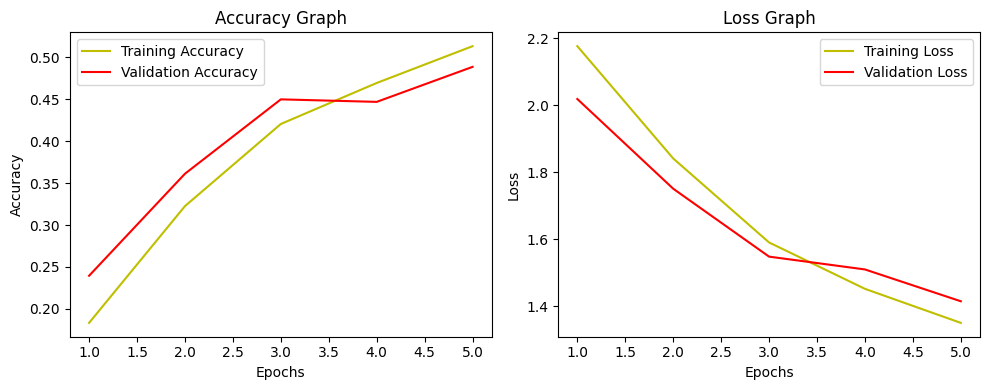

In [16]:
Graphs(history.history['accuracy'], history.history['loss'], history.history['val_accuracy'], history.history['val_loss'], range(1, len(history.history['accuracy'])+1))

In [17]:
model2 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

In [19]:
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
history = model2.fit(x_train10, y_train10, validation_data=(x_val10, y_val10), batch_size= 32, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.3095 - loss: 1.8231 - val_accuracy: 0.5228 - val_loss: 1.3154
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.5620 - loss: 1.2128 - val_accuracy: 0.6146 - val_loss: 1.0882
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.6414 - loss: 1.0118 - val_accuracy: 0.6606 - val_loss: 0.9842
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.6875 - loss: 0.8877 - val_accuracy: 0.6874 - val_loss: 0.9172
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7218 - loss: 0.7890 - val_accuracy: 0.6984 - val_loss: 0.9050


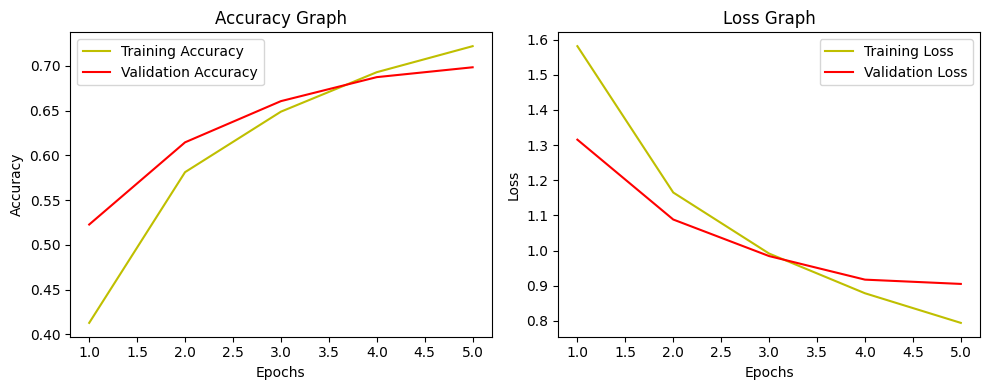

In [21]:
Graphs(history.history['accuracy'], history.history['loss'], history.history['val_accuracy'], history.history['val_loss'], range(1, len(history.history['accuracy'])+1))

In [22]:
model3 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax'),
])

In [24]:
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
history = model3.fit(x_train10, y_train10, validation_data=(x_val10, y_val10), batch_size= 32, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 33ms/step - accuracy: 0.3461 - loss: 1.8320 - val_accuracy: 0.5328 - val_loss: 1.2943
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.5736 - loss: 1.2400 - val_accuracy: 0.6106 - val_loss: 1.1485
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.6526 - loss: 1.0256 - val_accuracy: 0.6302 - val_loss: 1.1375
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.6967 - loss: 0.8942 - val_accuracy: 0.6674 - val_loss: 1.0184
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.7323 - loss: 0.8007 - val_accuracy: 0.7172 - val_loss: 0.8505
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.7648 - loss: 0.7100 - val_accuracy: 0.6676 - val_loss: 1.1212
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.7858 - loss: 0.6498 - val_accuracy: 0.7038 - val_loss: 0.9402
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.8034 -

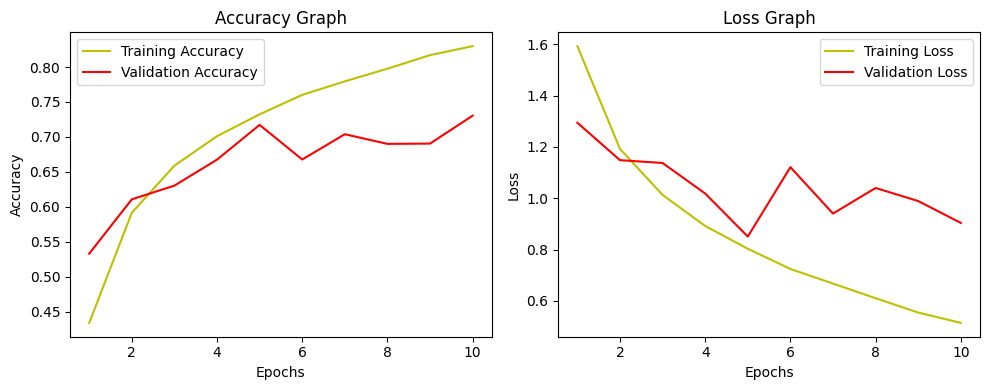

In [26]:
Graphs(history.history['accuracy'], history.history['loss'], history.history['val_accuracy'], history.history['val_loss'], range(1, len(history.history['accuracy'])+1))

In [27]:
model1.evaluate(x_test10, y_test10)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4812 - loss: 1.4066 


[1.3950070142745972, 0.4885999858379364]

In [28]:
model2.evaluate(x_test10, y_test10)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6793 - loss: 0.9580 


[0.9169401526451111, 0.6877999901771545]

In [29]:
model3.evaluate(x_test10, y_test10)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7265 - loss: 0.9255 


[0.8993545174598694, 0.7257999777793884]

In [31]:
prediction = model3.predict(x_test10)
y_pred     = [np.argmax(i) for i in prediction]
print(classification_report(y_test10, y_pred))

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step 
              precision    recall  f1-score   support

           0       0.73      0.82      0.77       491
           1       0.92      0.82      0.87       478
           2       0.65      0.54      0.59       500
           3       0.53      0.55      0.54       532
           4       0.55      0.79      0.65       467
           5       0.63      0.68      0.66       497
           6       0.79      0.78      0.78       524
           7       0.85      0.69      0.76       502
           8       0.88      0.80      0.84       497
           9       0.86      0.81      0.83       512

    accuracy                           0.73      5000
   macro avg       0.74      0.73      0.73      5000
weighted avg       0.74      0.73      0.73      5000



In [34]:
model3.save('CIPHAR10.h5') # CIFAR10

In [32]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [35]:
model = models.load_model('CIPHAR10.h5')

In [36]:
image = x_train10[15]
label = y_train10.reshape(-1)[15]
image = tf.expand_dims(image, axis=0)
original_class = classes[label]
print('Original Class: ',original_class)

Original Class:  truck


In [37]:
prediction  = model.predict(image)
class_index = np.argmax(prediction)
print('Predicted Class: ',classes[class_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
Predicted Class:  truck


In [38]:
def ClassifyImage():
    path = str(input('Enter Path of Image: '))
    img  = tf.io.read_file(path)
    img  = tf.image.decode_jpeg(img, channels=3)
    plt.imshow(img)
    img  = tf.image.resize(img, [32,32])
    img  = img / 255.0
    img  = tf.expand_dims(img, axis=0)
    # Model: image classification
    probabilities = model.predict(img)
    max_index = np.argmax(probabilities)
    label= classes[max_index]
    print(f"\u2022 Image '{path}' belongs to class: {label}")

Enter Path of Image:  Final practical Ann/Final practical Ann/ship.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
• Image 'Final practical Ann/Final practical Ann/ship.jpg' belongs to class: ship


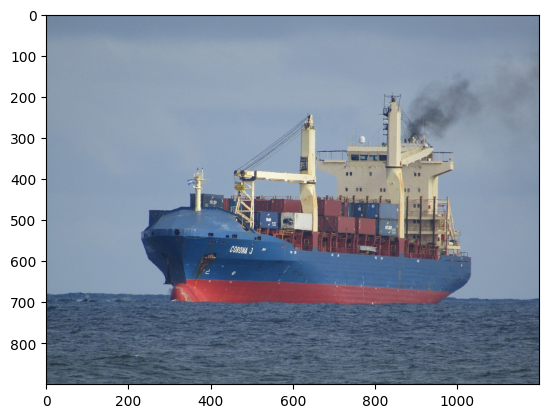

In [39]:
ClassifyImage()

<hr>